# Accessing data with CliMetLab

Here are a few example on how to get data into python using CliMetLab.
Most examples are taken from https://climetlab.readthedocs.io/en/latest/examples.html.

## Loading various sources

A source is a something providing data. It needs some parameters to define the actual location of the data. For instance, URL, a remote or local server, a database, or a file.

Below are a few examples of using ``cml.load_source()``.

Notice how: 
- The API to retrieve the data is similar.
- Credentials are requested if needed with appropriate help message, then saved locally.
- Data is provided as pandas.Dataframe or xarray.Dataset.

In [9]:
import climetlab as cml

In [10]:
# Downloading 32M of data (~3minutes).
URL = "https://www.ncei.noaa.gov/data/international-best-track-archive-for-climate-stewardship-ibtracs/v04r00/access/csv/ibtracs.SP.list.v04r00.csv"
data = cml.load_source("url", URL)
pd = data.to_pandas()

/Users/mafp/dev/climetlab/climetlab/readers/csv.py:148: DtypeWarning: Columns (1,2,8,9,14,161,162) have mixed types. Specify dtype option on import or set low_memory=False.
  return pandas.read_csv(self.path, **pandas_read_csv_kwargs)


/Users/mafp/dev/climetlab/climetlab/normalize.py:17: UserWarning: Deprecated decorator @normalize_arg. Use @normalise on each argument instead.
  warnings.warn(


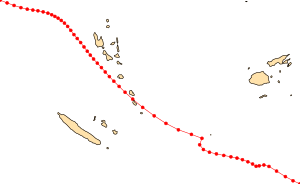

In [11]:
uma = pd[pd.NAME == "UMA:VELI"]
cml.plot_map(uma, style="cyclone-track")

2022-04-29 10:39:40,281 INFO Welcome to the CDS
2022-04-29 10:39:40,282 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-04-29 10:39:40,426 INFO Request is completed
2022-04-29 10:39:40,426 INFO Downloading https://download-0001-clone.copernicus-climate.eu/cache-compute-0001/cache/data2/adaptor.mars.internal-1651144466.5023644-28831-18-1dba6e73-e707-46c2-9b67-5a25def6983e.grib to /var/folders/mx/qjhp3qsj77zfb1x4vj6d6xtr0000gn/T/climetlab-mafp/c-dsretriever-132331462236ab95640d03007d4e2548bb05e6cdc85ca1f1f8e8365f1df369d2.cache.tmp (189.8K)
2022-04-29 10:39:47,176 INFO Download rate 28.1K/s 


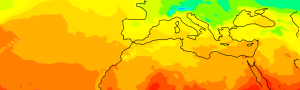

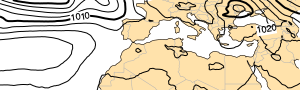

In [12]:
source = cml.load_source(
    "cds",
    "reanalysis-era5-single-levels",
    variable=["2t", "msl"],
    product_type="reanalysis",
    area=[50, -50, 20, 50],
    date="2012-12-12",
    time="12:00",
)
for s in source:
    cml.plot_map(s)

2022-04-29 10:39:48 ECMWF API python library 1.6.3
2022-04-29 10:39:48 ECMWF API at https://api.ecmwf.int/v1
2022-04-29 10:39:53 Welcome Florian Pinault
2022-04-29 10:39:57 In case of problems, please check https://confluence.ecmwf.int/display/WEBAPI/Web+API+FAQ or contact servicedesk@ecmwf.int
2022-04-29 10:40:00 Request submitted
2022-04-29 10:40:00 Request id: 626ba460c3b3633f02c13ad1
2022-04-29 10:40:00 Request is submitted
2022-04-29 10:40:13 Calling 'nice mars /tmp/20220429-0840/15/tmp-_marsNjKZqh.req'
2022-04-29 10:40:13 mars - WARN -
2022-04-29 10:40:13 mars - WARN - Due to the migration of our meteorological archive, there will be no or
2022-04-29 10:40:13 mars - WARN - degraded access to the archive at times between February 2022 and June 2022.
2022-04-29 10:40:13 mars - WARN - Please visit our dedicated confluence space for more information.
2022-04-29 10:40:13 mars - WARN - https://confluence.ecmwf.int/x/qv9CDQ
2022-04-29 10:40:13 mars - WARN -
2022-04-29 10:40:13 MIR envir

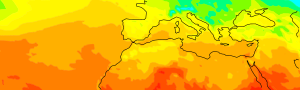

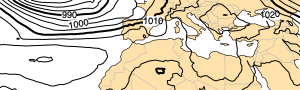

<xarray.Dataset>
Dimensions:     (number: 1, time: 1, step: 1, surface: 1, latitude: 31,
                 longitude: 101)
Coordinates:
  * number      (number) int64 0
  * time        (time) datetime64[ns] 2012-12-13T12:00:00
  * step        (step) timedelta64[ns] 00:00:00
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 50.0 49.0 48.0 47.0 ... 23.0 22.0 21.0 20.0
  * longitude   (longitude) float64 -50.0 -49.0 -48.0 -47.0 ... 48.0 49.0 50.0
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2m         (number, time, step, surface, latitude, longitude) float32 ...
    msl         (number, time, step, surface, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-04-29T10:40 GRIB to CDM+CF via cfgrib-0.9.1...

In [13]:
source = cml.load_source(
    "mars",
    param=["2t", "msl"],
    levtype="sfc",
    area=[50, -50, 20, 50],
    grid=[1, 1],
    date="2012-12-13",
)
for s in source:
    cml.plot_map(s)
source.to_xarray()

2022-04-29 10:41:01,005 INFO Downloading <multiple>


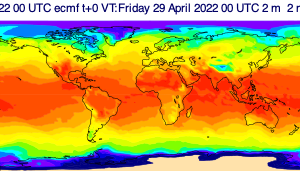

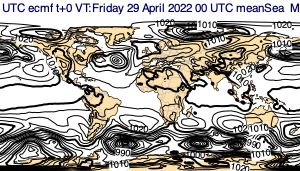

<xarray.Dataset>
Dimensions:            (time: 1, step: 1, heightAboveGround: 1, latitude: 451,
                        longitude: 900, meanSea: 1)
Coordinates:
  * time               (time) datetime64[ns] 2022-04-29
  * step               (step) timedelta64[ns] 00:00:00
  * heightAboveGround  (heightAboveGround) float64 2.0
  * latitude           (latitude) float64 90.0 89.6 89.2 ... -89.2 -89.6 -90.0
  * longitude          (longitude) float64 -180.0 -179.6 -179.2 ... 179.2 179.6
    valid_time         (time, step) datetime64[ns] ...
  * meanSea            (meanSea) float64 0.0
Data variables:
    t2m                (time, step, heightAboveGround, latitude, longitude) float32 ...
    msl                (time, step, meanSea, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            2
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-04-29T10:41 GRIB to CDM+CF via cfgrib-0.9.1...

In [14]:
source = cml.load_source(
    "ecmwf-open-data",
    param=["2t", "msl"],
)
for s in source:
    cml.plot_map(s, title=True)
source.to_xarray()

In [ ]:
source = cml.load_source(
    "mars",
    type="ofb",
    obsgroup="conv",
    time="12",
    format="odb",
    reportype=16001,
    date="2020-05-18",
)
pd = source.to_pandas()


## Dataset

A dataset is a clearly identified set of data. It has a name, can be cited, has documentation and, hopefully, somebody is maintaining it.

A dataset is an object created using cml.load_dataset(name, arg1, arg2=..., ...)

- The name is a string that uniquely identifies the dataset.
- The argument(s) arg1 and keyword argument(s) arg2 can be used to specify a subset of the dataset.
- The data can be accessed using methods such as to_xarray() or to_pandas() or other.
- Relevant metadata are attached directly to the dataset to provides additional information such as an URL, a citation, licence, etc.

In [16]:
atlantic = cml.load_dataset("hurricane-database", bassin="atlantic")
df = atlantic.to_pandas()

2022-04-29 10:42:35,787 INFO Downloading https://www.aoml.noaa.gov/hrd/hurdat/hurdat2.txt


In [17]:
# This can be long to run.
# ds = cml.load_dataset("era5-temperature", 
#    period=(1979, 1982),
#    domain="France",
#    time=12
# )
# ds.to_xarray()

2022-04-29 10:43:34,745 INFO Welcome to the CDS
2022-04-29 10:43:34,746 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-04-29 10:43:35,909 INFO Request is completed
2022-04-29 10:43:35,909 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data2/adaptor.mars.internal-1650963318.7648067-19956-7-f2428e98-58bb-4a4d-88b8-e91bb12272f0.grib to /var/folders/mx/qjhp3qsj77zfb1x4vj6d6xtr0000gn/T/climetlab-mafp/c-dsretriever-dea2e2530fa342440272d8d36f2473f002a1f1141bf9856498e748acec62c341.cache.tmp (2.8M)
2022-04-29 10:44:04,724 INFO Download rate 100.9K/s 
2022-04-29 10:44:05,219 INFO Welcome to the CDS
2022-04-29 10:44:05,219 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-single-levels
2022-04-29 10:44:05,772 INFO Request is completed
2022-04-29 10:44:05,772 INFO Downloading https://download-0000-clone.copernicus-climate.eu/cache-compute-0000/cache/d

<xarray.Dataset>
Dimensions:     (number: 1, time: 1461, step: 1, surface: 1, latitude: 63,
                 longitude: 63)
Coordinates:
  * number      (number) int64 0
  * time        (time) datetime64[ns] 1979-01-01T12:00:00 ... 1982-12-31T12:0...
  * step        (step) timedelta64[ns] 00:00:00
  * surface     (surface) float64 0.0
  * latitude    (latitude) float64 54.5 54.25 54.0 53.75 ... 39.5 39.25 39.0
  * longitude   (longitude) float64 -6.0 -5.75 -5.5 -5.25 ... 8.75 9.0 9.25 9.5
    valid_time  (time, step) datetime64[ns] ...
Data variables:
    t2m         (number, time, step, surface, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2022-04-29T11:47 GRIB to CDM+CF via cfgrib-0.9.1...

In [ ]:
import climetlab as cml
# If the dataset is not found, CliMetLab provides the list of available datasets:
cml.load_dataset('hurican-database-with-typo')

Exercice:
- Choose a example from https://climetlab.readthedocs.io/en/latest/examples.html. (the notebooks are also available in ~/climetlab/docs/examples).
- Modify and run it.



More datasets are made available with plugins (more about plugins in next session)

Exercice:
- Choose a plugin from https://climetlab.readthedocs.io/en/latest/guide/pluginlist.html
  - Suggested https://github.com/metno/maelstrom-yr 
  - or https://github.com/Climdyn/climetlab-eumetnet-postprocessing-benchmark
  - or https://github.com/ecmwf/climetlab-demo-dataset
- Install the plugin and retrieve data.